### Plot the number of MAGs for various quality

Near complete: 90% completeness and 5% contamination\
Higher quality: 70% completeness and 10% contamination\
Medium quality: 50% completeness and 10% contamination

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/performance_results.csv', header=0, sep='\t')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

    

Text(0, 0.5, '')

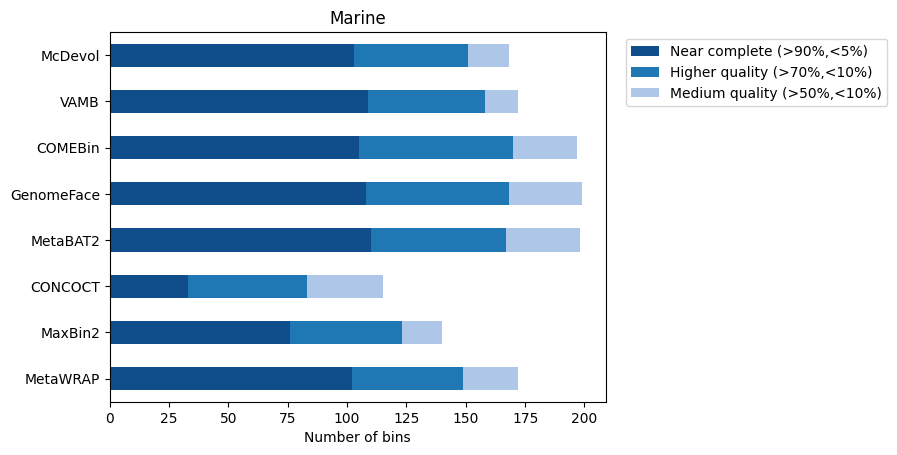

In [3]:
# Pooled assembly
ma_pooled = mags_counts.loc[mags_counts['Dataset']=='marine pooled']

plot_data = ma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('pooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


Text(0, 0.5, '')

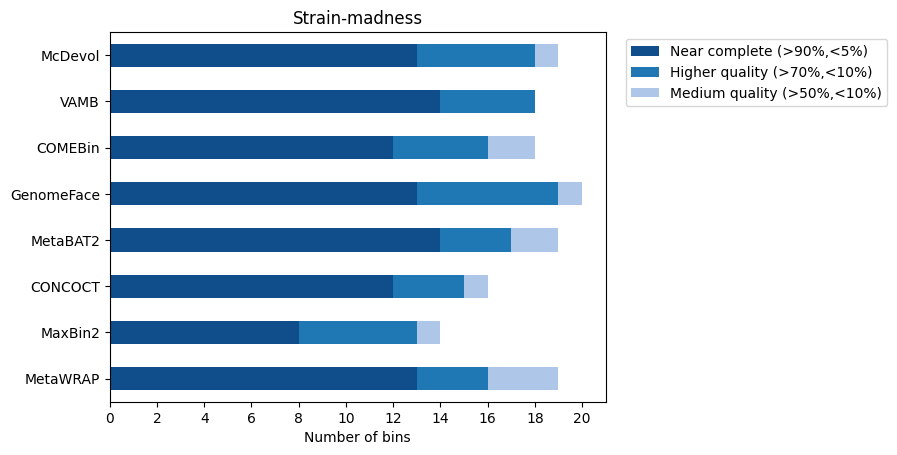

In [4]:

ss_pooled = mags_counts.loc[mags_counts['Dataset']=='strain pooled']

plot_data = ss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.xticks(range(0,22,2))
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('pooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

Text(0, 0.5, '')

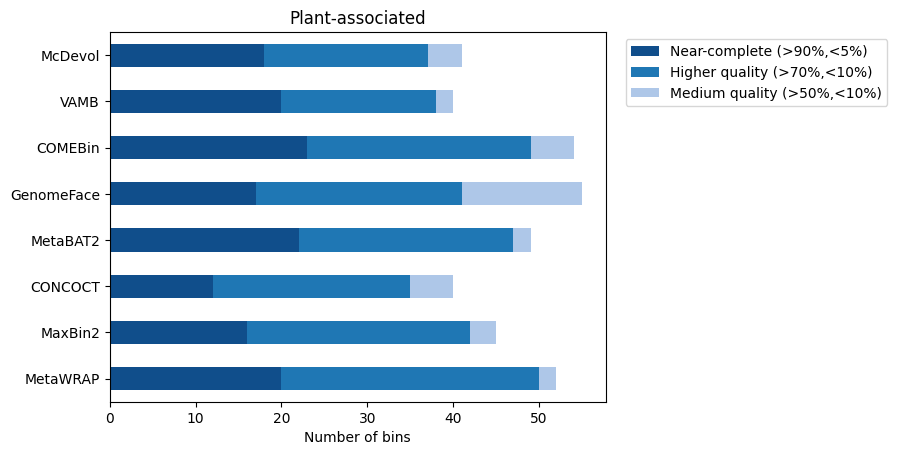

In [5]:
pl_pooled = mags_counts.loc[mags_counts['Dataset']=='plant pooled']

plot_data = pl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
plot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.xlabel('Number of bins')
plt.legend(['Near-complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'],loc=(1.04, 0.8))#'', frameon=False)
plt.ylabel('')
plt.savefig('pooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

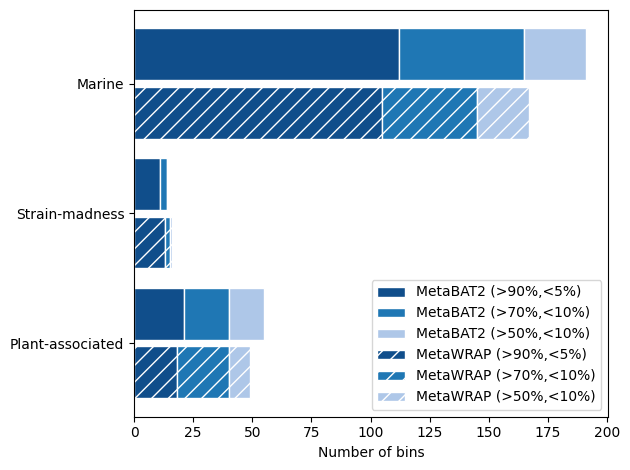

In [6]:
# CheckM results comparison between MetaBat2 and MetaWRAP
mags_counts_plot = pd.read_csv('/home/yazhini/work/binning_benchmarking/checkm_metabat2_metawrap.csv', header=0, sep='\t')

import matplotlib.pyplot as plt
import numpy as np

dataset_order = ['marine pooled', 'strain pooled', 'plant pooled']

mags_counts_plot['Dataset'] = pd.Categorical(mags_counts_plot['Dataset'], categories=dataset_order[::-1], ordered=True)
metabat2_data = mags_counts_plot[mags_counts_plot['Tools'] == 'MetaBAT2']
metawrap_data = mags_counts_plot[mags_counts_plot['Tools'] == 'MetaWRAP']

metabat2_data = metabat2_data.sort_values(by='Dataset')
metawrap_data = metawrap_data.sort_values(by='Dataset')


fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

y_pos = np.arange(len(dataset_order))
y_pos_metabat2 = y_pos + bar_width + bar_gap 

colors = ['#104e8b', '#1f77b4', '#aec7e8']

# Plot MetaBAT2 bars
ax.barh(y_pos_metabat2, metabat2_data['Near-complete (90%-5%)'], color=colors[0], height=bar_width, label='MetaBAT2 Near-complete', edgecolor='white')
ax.barh(y_pos_metabat2, metabat2_data['Higher'], left=metabat2_data['Near-complete (90%-5%)'], color=colors[1], height=bar_width, label='MetaBAT2 Higher',edgecolor='white')
ax.barh(y_pos_metabat2, metabat2_data['Medium'], left=metabat2_data['Near-complete (90%-5%)'] + metabat2_data['Higher'], color=colors[2], height=bar_width, label='MetaBAT2 Medium', edgecolor='white')

# Plot MetaWRAP bars
ax.barh(y_pos, metawrap_data['Near-complete (90%-5%)'], color=colors[0], height=bar_width, label='MetaWRAP Near-complete', hatch='//',edgecolor='white')
ax.barh(y_pos, metawrap_data['Higher'], left=metawrap_data['Near-complete (90%-5%)'], color=colors[1], height=bar_width, label='MetaWRAP Higher', hatch='//',edgecolor='white')
ax.barh(y_pos, metawrap_data['Medium'], left=metawrap_data['Near-complete (90%-5%)'] + metawrap_data['Higher'], color=colors[2], height=bar_width, label='MetaWRAP Medium', hatch='//',edgecolor='white')

ax.set_yticks(y_pos + (bar_width + bar_gap) / 2)
ax.set_yticklabels(['Plant-associated', 'Strain-madness', 'Marine'])

ax.set_xlabel('Number of bins')

handles, _ = ax.get_legend_handles_labels()
labels = ['MetaBAT2 (>90%,<5%)', 'MetaBAT2 (>70%,<10%)', 'MetaBAT2 (>50%,<10%)', 'MetaWRAP (>90%,<5%)', 'MetaWRAP (>70%,<10%)', 'MetaWRAP (>50%,<10%)']
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(),unique_labels.keys())

plt.tight_layout()
plt.savefig('plots/checkm_metabat2_metawrap.png', dpi=600, format='png', bbox_inches='tight')


### Reassembly results

(-0.5, 7.5)

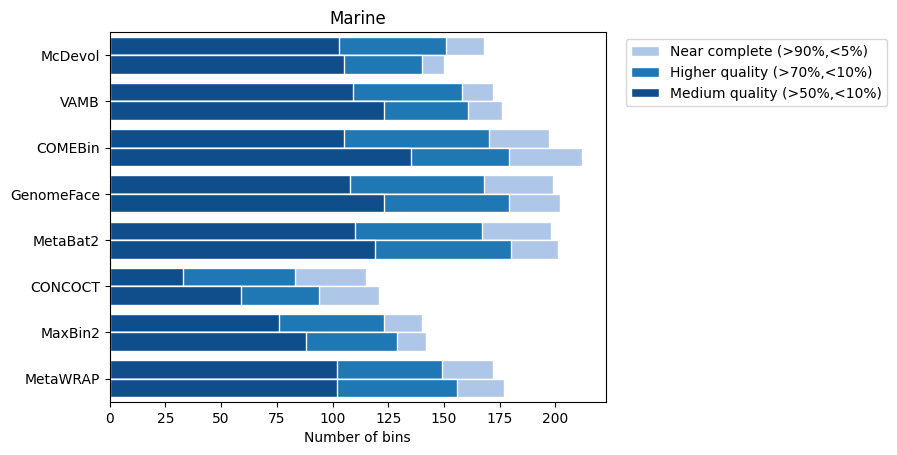

In [7]:
# reassembly
# link: https://stackoverflow.com/questions/59922701/how-can-i-group-a-stacked-bar-chart
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

mags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/performance_results.csv', header=0, sep='\t')
mags_counts.index = mags_counts['Tools']
mags_counts = mags_counts.iloc[::-1]

mags_counts_ma = mags_counts.loc[mags_counts['Dataset'].str.contains('marine pooled|marine reassembly')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order, level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

fig, ax = plt.subplots()
bar_width = 0.4
bar_gap = 0.05

y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

# Plot the stacked bar segments for "marine reassembly" with shifted positions
(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly'] +
 mags_counts_maplot['Higher']['marine reassembly'] +
 mags_counts_maplot['Medium']['marine reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly'] +
 mags_counts_maplot['Higher']['marine reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 7.5)

plt.savefig('plots/pooled_reassembly_marine.png', dpi=600, format='png', bbox_inches='tight')

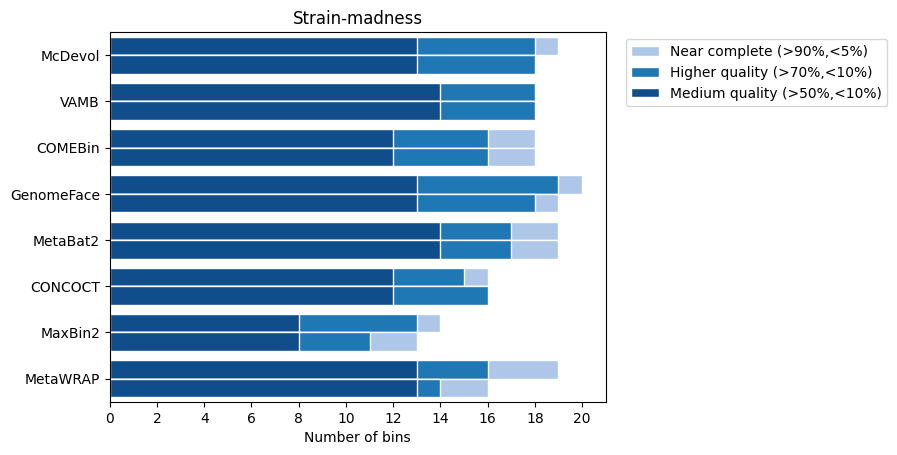

In [8]:
# strain-madness
mags_counts_ss = mags_counts.loc[mags_counts['Dataset'].str.contains('strain pooled|strain reassembly')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order, level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05


y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly'] +
 mags_counts_ssplot['Higher']['strain reassembly'] +
 mags_counts_ssplot['Medium']['strain reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly'] +
 mags_counts_ssplot['Higher']['strain reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.xticks(range(0,22,2))
plt.ylim(-0.5, 7.5)

plt.savefig('plots/pooled_reassembly_strain.png', dpi=600, format='png', bbox_inches='tight')

(-0.5, 7.5)

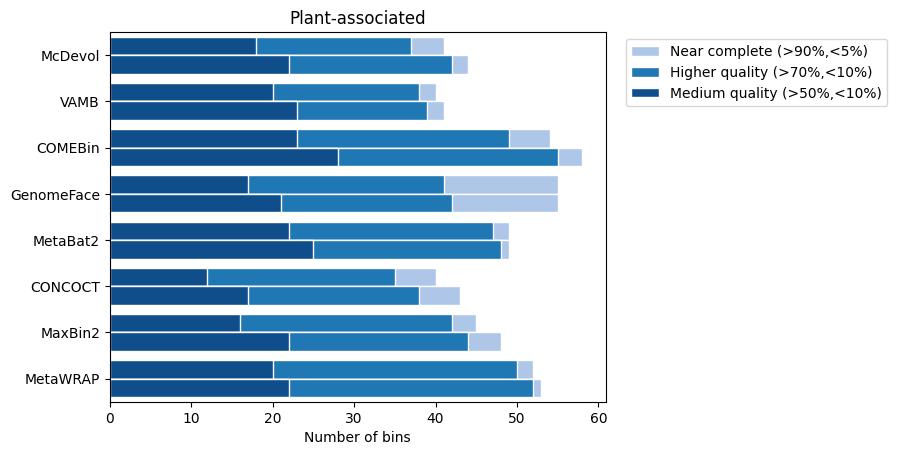

In [9]:
# plant-associated
mags_counts_pl = mags_counts.loc[mags_counts['Dataset'].str.contains('plant pooled|plant reassembly')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order, level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

fig, ax = plt.subplots()
bar_width = 0.4
bar_gap = 0.05

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly'] +
 mags_counts_plplot['Higher']['plant reassembly'] +
 mags_counts_plplot['Medium']['plant reassembly']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly'] +
 mags_counts_plplot['Higher']['plant reassembly']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant reassembly']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('Plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 7.5)

plt.savefig('plots/pooled_reassembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### Gold standard pooled assembly plots

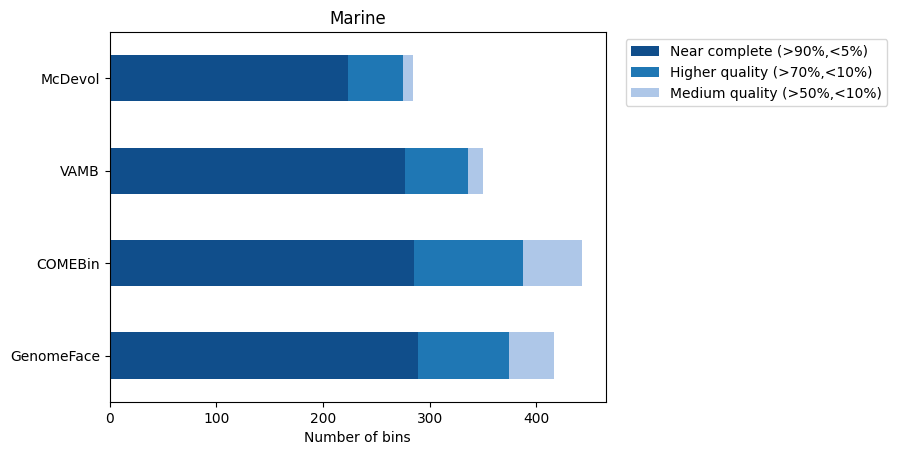

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/goldstandard_pooled_checkm2.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]

# Pooled assembly
gsma_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Marine']

gsplot_data = gsma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


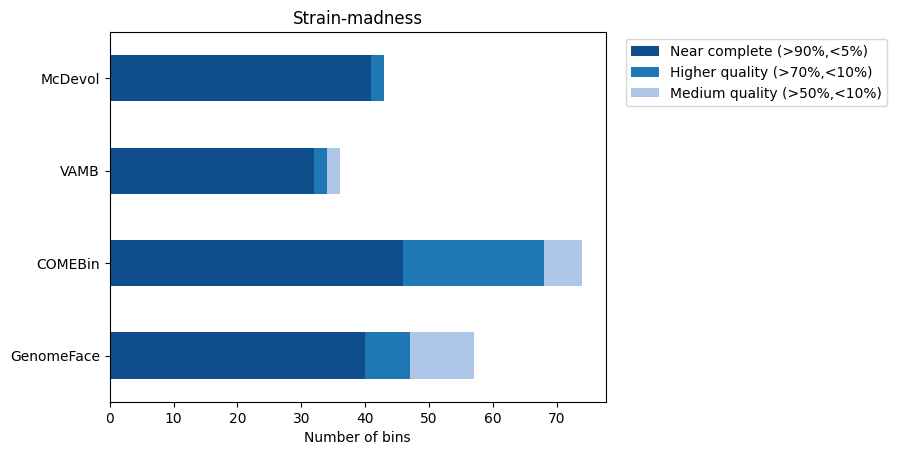

In [187]:
gsss_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Strain-madness']

gsplot_data = gsss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

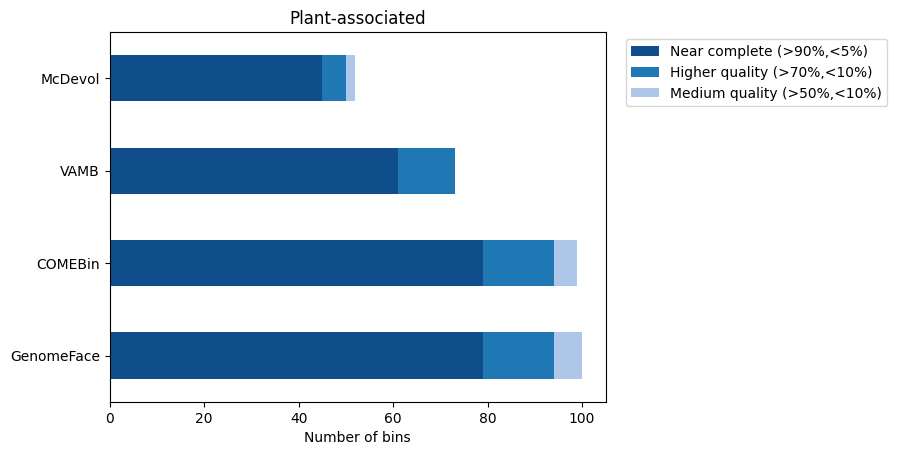

In [186]:
gspl_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Plant-associated']

gsplot_data = gspl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('gspooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### AMBER assessment

Text(0, 0.5, '')

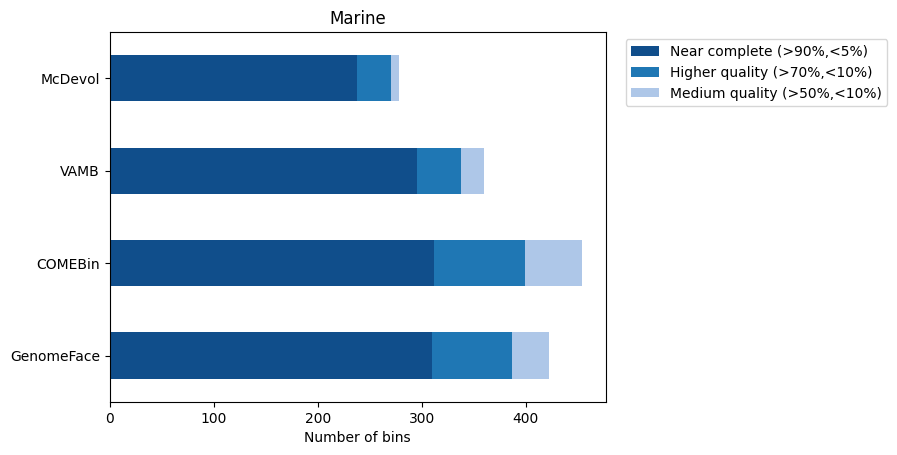

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ['#104e8b', '#1f77b4', '#aec7e8']

gsmags_counts = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/goldstandard_pooled_amber.csv', header=0, sep='\t')
gsmags_counts.index = gsmags_counts['Tools']
gsmags_counts = gsmags_counts.iloc[::-1]
gsmags_counts
# Pooled assembly
gsma_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Marine']

gsplot_data = gsma_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Marine')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_marine.png', dpi=600, format='png', bbox_inches='tight')


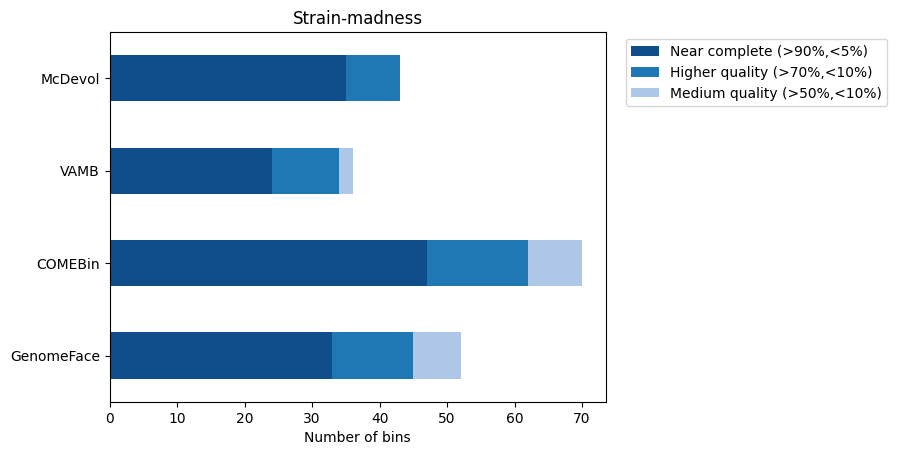

In [189]:
gsss_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Strain-madness']

gsplot_data = gsss_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Strain-madness')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_strain.png', dpi=600, format='png', bbox_inches='tight')

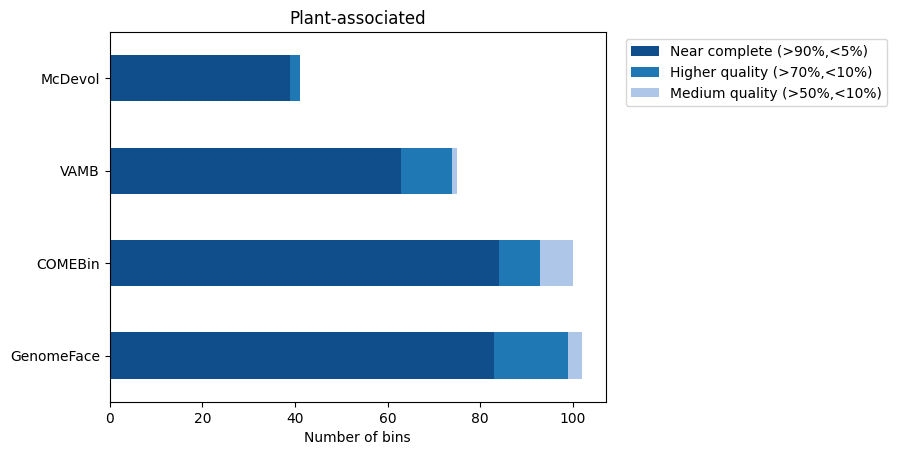

In [190]:
gspl_pooled = gsmags_counts.loc[gsmags_counts['Dataset']=='Plant-associated']

gsplot_data = gspl_pooled[['Near-complete (90%-5%)', 'Higher', 'Medium']]
colors = ['#104e8b', '#1f77b4', '#aec7e8']
gsplot_data.plot.barh(stacked=True, color=colors)
plt.title('Plant-associated')
plt.xlabel('bin counts')
plt.legend(['Near complete (>90%,<5%)','Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))#'', frameon=False)
plt.xlabel('Number of bins')
plt.ylabel('')
plt.savefig('amber_gspooled_assembly_plant.png', dpi=600, format='png', bbox_inches='tight')

### Time and memory usage (megahit pooled assembly)

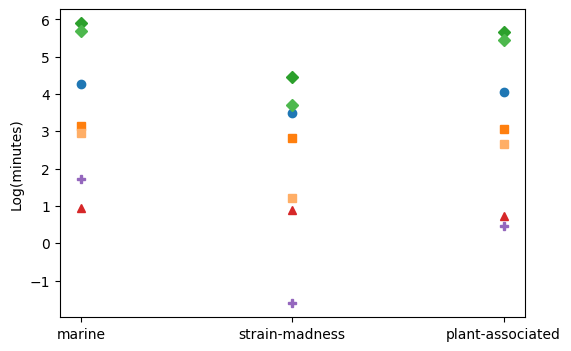

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

time_memory = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/time_memory_usage_pooled_plot',  header=0, sep='\t')
tools = time_memory['Tools'].unique()
datasets = time_memory['Datasets'].unique()

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
markers = ['o', 's', 's', 'D', 'D', '^', 'P']
colors = ['#1f77b4', '#ff7f0e', '#ffae66', '#2ca02c', '#4db84d','#d62728', '#9467bd']
# Plotting Time Data
for i, tool in enumerate(tools):
    time_data = time_memory[time_memory['Tools'] == tool]['Time (minutes)']
    ax.plot(datasets, np.log(time_data), marker=markers[i], label=tool, color = colors[i], linewidth=0.0)
ax.set_ylabel('Log(minutes)')
plt.savefig('plots/time_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

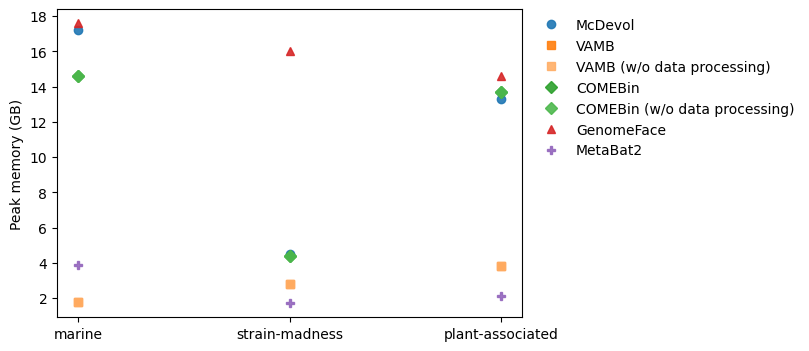

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
markers = ['o', 's', 's', 'D', 'D', '^', 'P']
colors = ['#1f77b4', '#ff7f0e', '#ffae66', '#2ca02c', '#4db84d', '#d62728', '#9467bd']
# Plotting Time Data
for i, tool in enumerate(tools):
    memory_data = time_memory[time_memory['Tools'] == tool]['Memory (GB)']
    ax.plot(datasets, memory_data, marker=markers[i], label=tool, color = colors[i], linewidth=0.0, alpha=0.9)
ax.set_ylabel('Peak memory (GB)')
ax.legend(loc=(1.02,0.5),frameon=False)
plt.savefig('plots/memory_requirement_mapooled.png', dpi=600, format='png', bbox_inches='tight')

### single vs multi-sample assembly binning

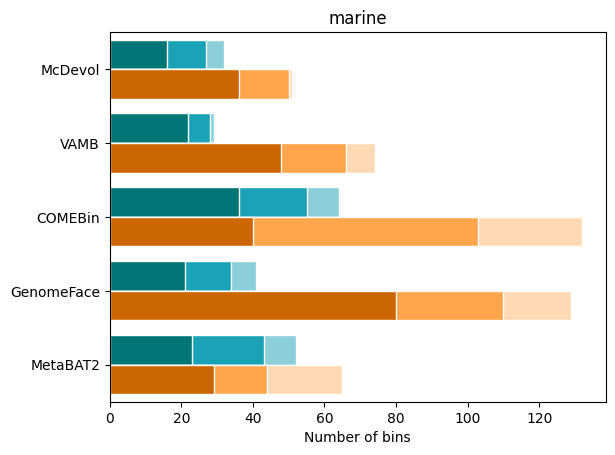

In [22]:
# marine
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/single_vs_multisample_binning', header=0, sep='\t')
mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine single|marine multisample nr')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']


y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
 mags_counts_maplot['Higher']['marine single'] +
 mags_counts_maplot['Medium']['marine single']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
mags_counts_maplot['Higher']['marine single']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr'] +
 mags_counts_maplot['Medium']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 4.5)

plt.savefig('plots/single_vs_multi_marine_amber.png', dpi=600, format='png', bbox_inches='tight')


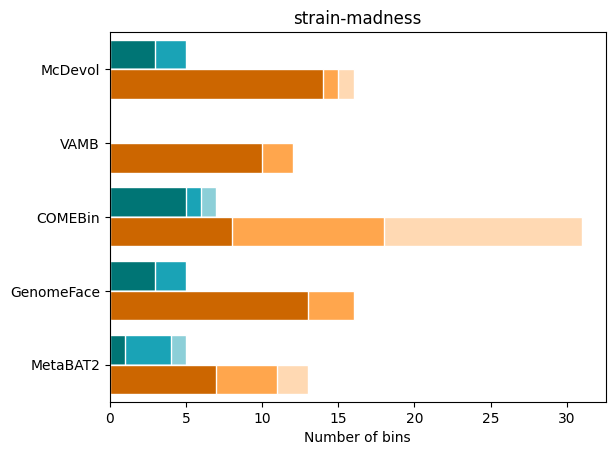

In [26]:
# strain
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/single_vs_multisample_binning', header=0, sep='\t')
mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain single|strain multisample nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']


y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
 mags_counts_ssplot['Higher']['strain single'] +
 mags_counts_ssplot['Medium']['strain single']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
mags_counts_ssplot['Higher']['strain single']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr'] +
 mags_counts_ssplot['Medium']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 4.5)

plt.savefig('plots/single_vs_multi_strain_amber.png', dpi=600, format='png', bbox_inches='tight')


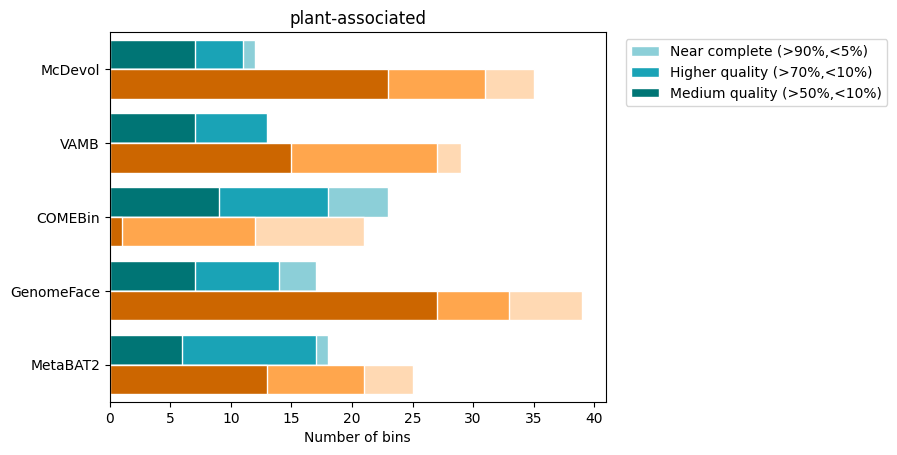

In [25]:
# plant
# plant
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/single_vs_multisample_binning', header=0, sep='\t')
mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant single|plant multisample nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']


y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
 mags_counts_plplot['Higher']['plant single'] +
 mags_counts_plplot['Medium']['plant single']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
mags_counts_plplot['Higher']['plant single']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr'] +
 mags_counts_plplot['Medium']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 4.5)

plt.savefig('plots/single_vs_multi_plant_amber.png', dpi=600, format='png', bbox_inches='tight')


### Multi-sample binning assessment AMBER

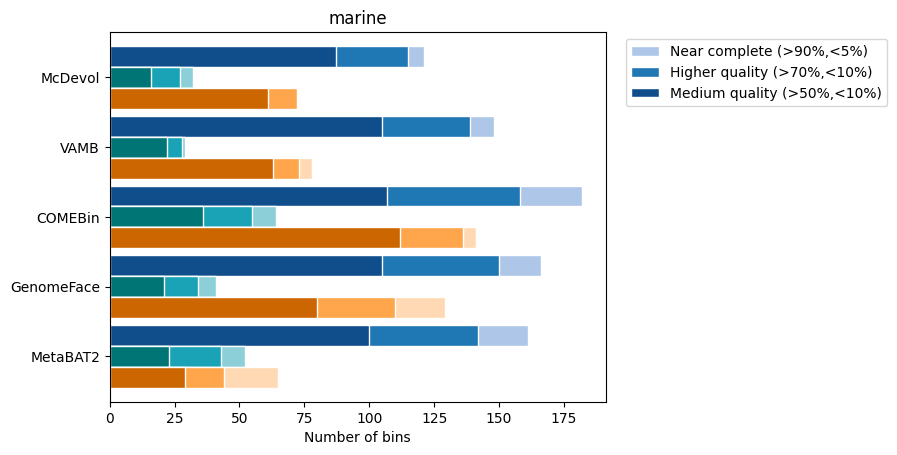

In [55]:
# marine
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')
mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine pooled|marine single|marine multisample nr')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin','GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.3
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
 mags_counts_maplot['Higher']['marine single'] +
 mags_counts_maplot['Medium']['marine single']).plot(
    kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single'] +
mags_counts_maplot['Higher']['marine single']).plot(
    kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine single']).plot(
    kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr'] +
 mags_counts_maplot['Medium']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr'] +
 mags_counts_maplot['Higher']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.8, 4.5)

plt.savefig('plots/pooled_single_multisample_nr_marine_amber.png', dpi=600, format='png', bbox_inches='tight')


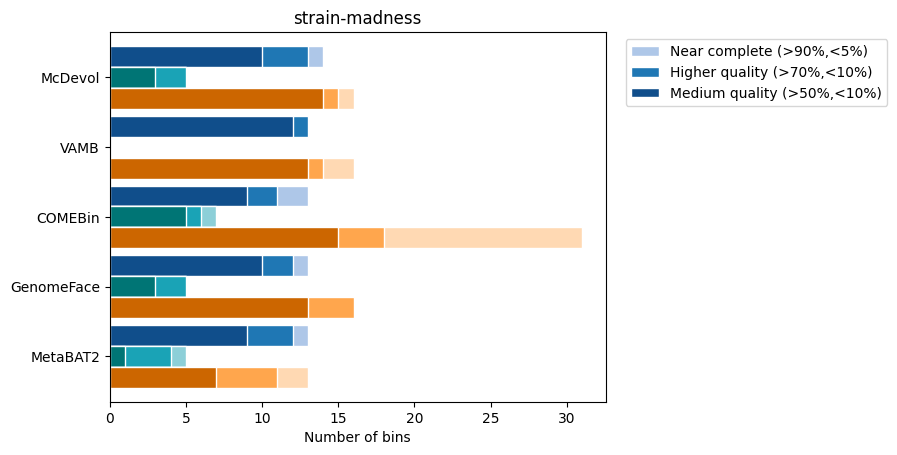

In [56]:
# strain
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')
mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain single|strain multisample nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin','GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.3
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
 mags_counts_ssplot['Higher']['strain single'] +
 mags_counts_ssplot['Medium']['strain single']).plot(
    kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single'] +
mags_counts_ssplot['Higher']['strain single']).plot(
    kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain single']).plot(
    kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr'] +
 mags_counts_ssplot['Medium']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_ssplot.index.get_level_values(0).unique())

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.8, 4.5)

plt.savefig('plots/pooled_single_multisample_nr_strain_amber.png', dpi=600, format='png', bbox_inches='tight')


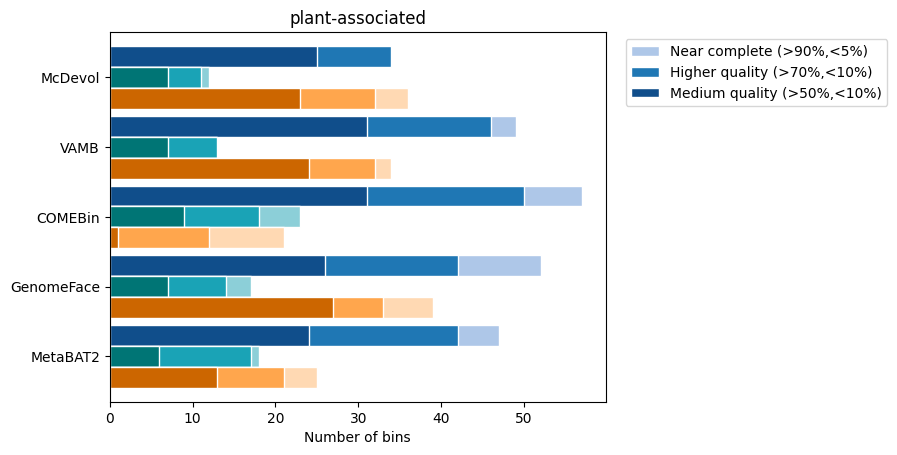

In [57]:
# plant
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/results/pooled_vs_single_vs_multisamplenonredundant', header=0, sep='\t')
mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant single|plant multisample nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin','GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.3
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ss = ['#007575', '#1AA3B6', '#8CCFD8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
 mags_counts_plplot['Higher']['plant single'] +
 mags_counts_plplot['Medium']['plant single']).plot(
    kind='barh', color=colors_ss[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single'] +
mags_counts_plplot['Higher']['plant single']).plot(
    kind='barh', color=colors_ss[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant single']).plot(
    kind='barh', color=colors_ss[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr'] +
 mags_counts_plplot['Medium']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_plplot.index.get_level_values(0).unique())

plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.8, 4.5)

plt.savefig('plots/pooled_single_multisample_nr_plant_amber.png', dpi=600, format='png', bbox_inches='tight')


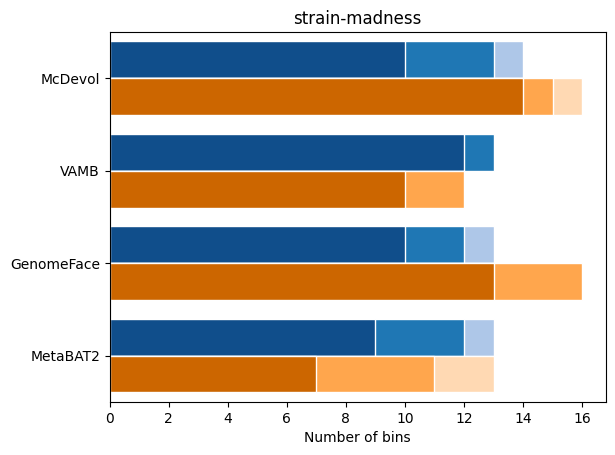

In [13]:
# strain-madness
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisamplenonredundant_amberassessment', header=0, sep='\t')

mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain multisample nr')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr'] +
 mags_counts_ssplot['Medium']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr'] +
 mags_counts_ssplot['Higher']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)


plt.savefig('plots/pooled_multisample_nr_strain_amber.png', dpi=600, format='png', bbox_inches='tight')


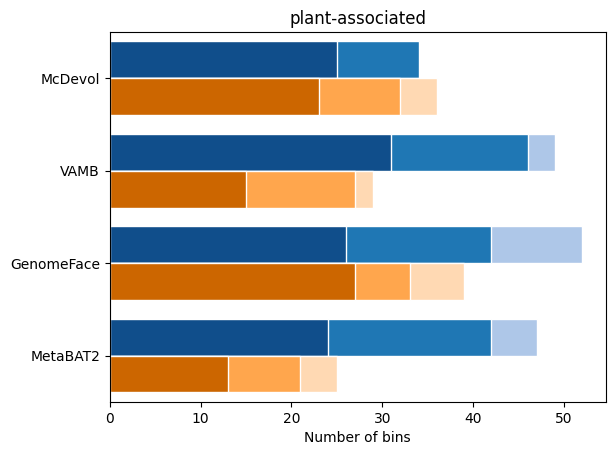

In [14]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/pooled_vs_multisamplenonredundant_amberassessment', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant multisample nr')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'GenomeFace', 'MetaBat2']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors = ['#104e8b', '#1f77b4', '#aec7e8']
colors_ms = ['#cc6600', '#ffa64d', '#ffd9b3']

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr'] +
 mags_counts_plplot['Medium']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr'] +
 mags_counts_plplot['Higher']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant multisample nr']).plot(
    kind='barh', color=colors_ms[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 3.5)
plt.savefig('plots/pooled_multisample_nr_plant_amber.png', dpi=600, format='png', bbox_inches='tight')


### Cluster and split vs split and cluster

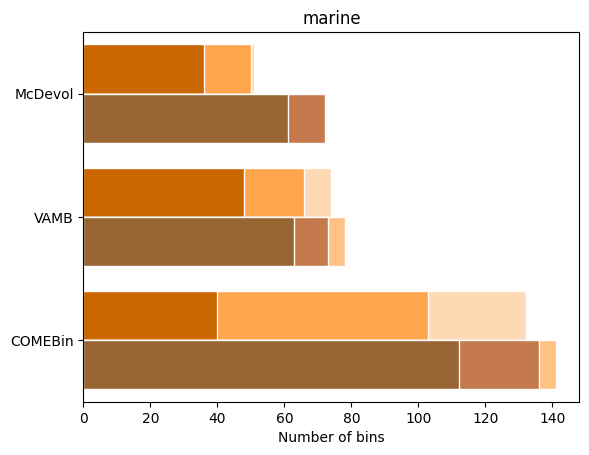

In [32]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine_cluster_split|marine_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin']

fig, ax = plt.subplots()

bar_width = 0.4
bar_gap = 0.05

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']

y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]

(mags_counts_plplot['Near-complete (90%-5%)']['marine_cluster_split'] +
 mags_counts_plplot['Higher']['marine_cluster_split'] +
 mags_counts_plplot['Medium']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_cluster_split'] +
mags_counts_plplot['Higher']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_plplot['Higher']['marine_split_cluster'] +
 mags_counts_plplot['Medium']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_plplot['Higher']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')

plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 2.5)


plt.savefig('plots/marine_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

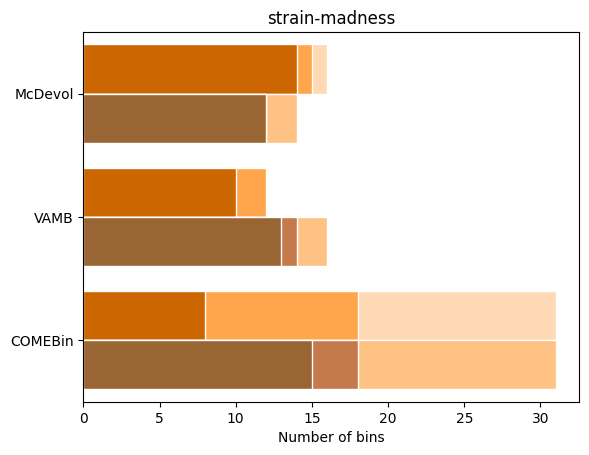

In [33]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain_cluster_split|strain_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set

# Plot the stacked bar segments for "strain_cluster_split"
(mags_counts_plplot['Near-complete (90%-5%)']['strain_cluster_split'] +
 mags_counts_plplot['Higher']['strain_cluster_split'] +
 mags_counts_plplot['Medium']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_cluster_split'] +
mags_counts_plplot['Higher']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_plplot['Higher']['strain_split_cluster'] +
 mags_counts_plplot['Medium']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_plplot['Higher']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 2.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/strain_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

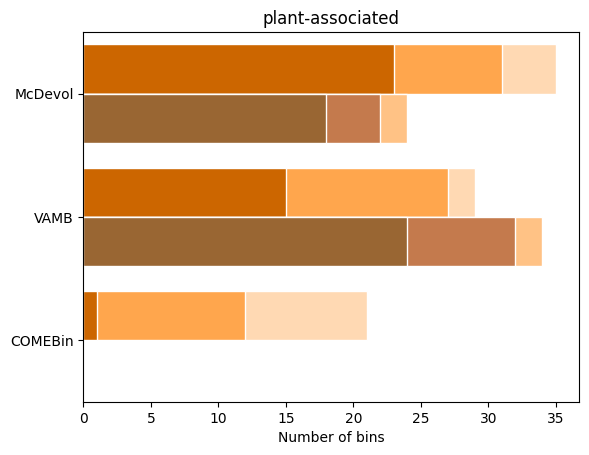

In [35]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant_cluster_split|plant_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB', 'COMEBin']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.4
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_shifted = [pos + bar_width + 2* bar_gap for pos in y_pos] 
# Plot the stacked bar segments for "plant_cluster_split"
(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
 mags_counts_plplot['Higher']['plant_cluster_split'] +
 mags_counts_plplot['Medium']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
mags_counts_plplot['Higher']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster'] +
 mags_counts_plplot['Medium']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=1, edgecolor='white')


# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 2.5)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/plant_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

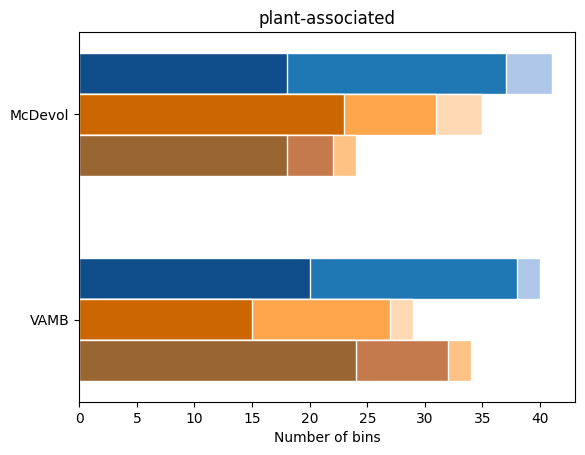

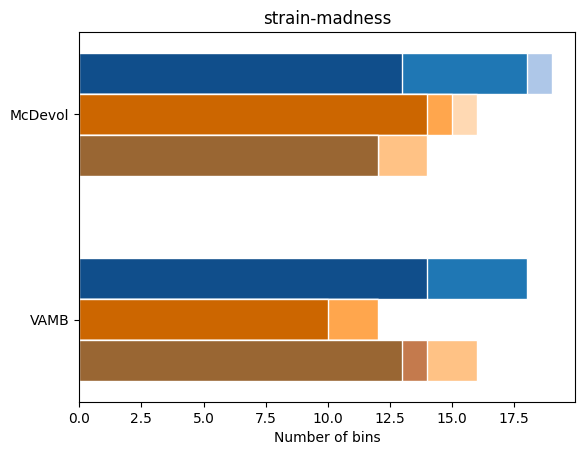

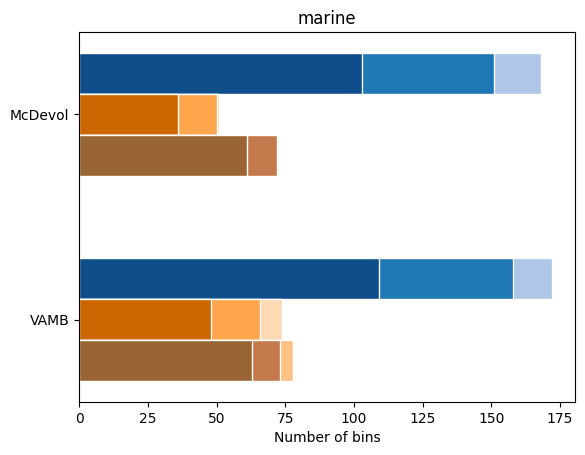

In [192]:
# plant_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_pl = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('plant pooled|plant_cluster_split|plant_split_cluster')]
mags_counts_pl.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_pl.index.get_level_values(0).unique()
mags_counts_plplot = mags_counts_pl.reindex(tools_order[::-1], level=0)
mags_counts_plplot = mags_counts_plplot.unstack(level=-1)

tools = ['McDevol', 'VAMB']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.2
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_plplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 * (bar_width + bar_gap) for pos in y_pos] 
# Plot the stacked bar segments for "plant_cluster_split"
(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled'] +
 mags_counts_plplot['Medium']['plant pooled']).plot(
    kind='barh', color=colors_pooled[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled'] +
 mags_counts_plplot['Higher']['plant pooled']).plot(
    kind='barh', color=colors_pooled[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant pooled']).plot(
    kind='barh', color=colors_pooled[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
 mags_counts_plplot['Higher']['plant_cluster_split'] +
 mags_counts_plplot['Medium']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split'] +
mags_counts_plplot['Higher']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster'] +
 mags_counts_plplot['Medium']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster'] +
 mags_counts_plplot['Higher']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_plplot['Near-complete (90%-5%)']['plant_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('plant-associated')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 1.3)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/plant_pooled_cluster_split.png', dpi=600, format='png', bbox_inches='tight')


# strain_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_ss = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('strain pooled|strain_cluster_split|strain_split_cluster')]
mags_counts_ss.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ss.index.get_level_values(0).unique()
mags_counts_ssplot = mags_counts_ss.reindex(tools_order[::-1], level=0)
mags_counts_ssplot = mags_counts_ssplot.unstack(level=-1)

tools = ['McDevol', 'VAMB']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.2
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_ssplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 
# Plot the stacked bar segments for "strain_cluster_split"
(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled'] +
 mags_counts_ssplot['Medium']['strain pooled']).plot(
    kind='barh', color=colors_pooled[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled'] +
 mags_counts_ssplot['Higher']['strain pooled']).plot(
    kind='barh', color=colors_pooled[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain pooled']).plot(
    kind='barh', color=colors_pooled[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_cluster_split'] +
 mags_counts_ssplot['Higher']['strain_cluster_split'] +
 mags_counts_ssplot['Medium']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_cluster_split'] +
mags_counts_ssplot['Higher']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_ssplot['Higher']['strain_split_cluster'] +
 mags_counts_ssplot['Medium']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_split_cluster'] +
 mags_counts_ssplot['Higher']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_ssplot['Near-complete (90%-5%)']['strain_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=2, edgecolor='white')
ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())
# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('strain-madness')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 1.3)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/strain_pooled_cluster_split.png', dpi=600, format='png', bbox_inches='tight')

# marine_associated
nonredundant_mags = pd.read_csv('/home/yazhini/work/binning_benchmarking/multisample_cluster_split_vs_split_cluster.csv', header=0, sep='\t')

mags_counts_ma = nonredundant_mags.loc[nonredundant_mags['Dataset'].str.contains('marine pooled|marine_cluster_split|marine_split_cluster')]
mags_counts_ma.set_index(['Tools', 'Dataset'], inplace=True)
tools_order = mags_counts_ma.index.get_level_values(0).unique()
mags_counts_maplot = mags_counts_ma.reindex(tools_order[::-1], level=0)
mags_counts_maplot = mags_counts_maplot.unstack(level=-1)

tools = ['McDevol', 'VAMB']

fig, ax = plt.subplots()

# Set bar width and gap size
bar_width = 0.2
bar_gap = 0.05  # Gap between the pairs

colors_cs = ['#cc6600', '#ffa64d', '#ffd9b3']
colors_sc = ['#996633', '#c47a4d', '#ffc285']
colors_pooled = ['#104e8b', '#1f77b4', '#aec7e8']

# Calculate positions for each bar
y_pos = range(len(mags_counts_maplot))
y_pos_shifted = [pos + bar_width + bar_gap for pos in y_pos]  # Shift positions for the second set
y_pos_pooled_shifted = [pos + 2 *(bar_width + bar_gap) for pos in y_pos] 
# Plot the stacked bar segments for "marine_cluster_split"
(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled'] +
 mags_counts_maplot['Medium']['marine pooled']).plot(
    kind='barh', color=colors_pooled[2], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled'] +
 mags_counts_maplot['Higher']['marine pooled']).plot(
    kind='barh', color=colors_pooled[1], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine pooled']).plot(
    kind='barh', color=colors_pooled[0], width=bar_width, ax=ax, position=0, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_cluster_split'] +
 mags_counts_maplot['Higher']['marine_cluster_split'] +
 mags_counts_maplot['Medium']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[2], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_cluster_split'] +
mags_counts_maplot['Higher']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[1], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_cluster_split']).plot(
    kind='barh', color=colors_cs[0], width=bar_width, ax=ax, position=1, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_maplot['Higher']['marine_split_cluster'] +
 mags_counts_maplot['Medium']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[2], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_split_cluster'] +
 mags_counts_maplot['Higher']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[1], width=bar_width, ax=ax, position=2, edgecolor='white')

(mags_counts_maplot['Near-complete (90%-5%)']['marine_split_cluster']).plot(
    kind='barh', color=colors_sc[0], width=bar_width, ax=ax, position=2, edgecolor='white')

ax.set_yticks([pos - 0.5 * (bar_width) for pos in y_pos])
ax.set_yticklabels(mags_counts_maplot.index.get_level_values(0).unique())

# Customize plot appearance
# plt.legend(['Near complete (>90%,<5%)', 'Higher quality (>70%,<10%)', 'Medium quality (>50%,<10%)'], loc=(1.04, 0.8))
plt.title('marine')
plt.xlabel('Number of bins')
plt.ylabel('')
plt.ylim(-0.5, 1.3)
# Adjust the layout to ensure all bars are fully visible
# plt.tight_layout(rect=[1, 1, 2, 1.95])  # Adjust the rect parameter to add padding at the top

plt.savefig('plots/marine_pooled_cluster_split.png', dpi=600, format='png', bbox_inches='tight')
